## ENTRENAMIENTO MODELO Y EVALUACIÓN

In [1]:
import pandas as pd
import pickle 

In [2]:
df = pd.read_csv('../data/train/train_copy.csv')
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,...,danceability_category_encoded,loudness_category_numerica,loudness_category_numerica2,valence_cat_num,speech_cat_num,speech_cat_num2,energy_cat_num,energy_cat_num2,popularity_cat_num,popularity_cat_num2
0,33018.0,Staind,Zoe Jane,52.0,0.01460,0.505,276840.0,0.687,0.021800,D#,...,1,5.0,9.0,0.0,0.0,0.0,3.0,6.0,2.0,6.0
1,83669.0,Ella Fitzgerald,People Will Say We're In Love,32.0,0.75300,0.304,-1.0,0.309,0.000000,G#,...,0,1.0,6.0,2.0,0.0,0.0,1.0,2.0,1.0,4.0
2,28174.0,empty_field,Glow Like Dat,65.0,0.41100,0.787,210862.0,0.586,0.000311,A#,...,2,5.0,9.0,4.0,1.0,2.0,2.0,7.0,3.0,2.0
3,39987.0,Pop Evil,Boss's Daughter,44.0,0.00016,0.418,-1.0,0.966,0.005690,G,...,1,4.0,6.0,4.0,4.0,14.0,4.0,4.0,2.0,6.0
4,55319.0,Frank Zappa,Muffin Man,48.0,0.11100,0.412,337733.0,0.657,0.000088,F#,...,1,1.0,6.0,6.0,1.0,2.0,3.0,6.0,2.0,6.0


In [3]:
df1 = pd.read_csv('../data/test/test_copy.csv')
df1.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,...,danceability_category_encoded,loudness_category_numerica,loudness_category_numerica2,valence_cat_num,speech_cat_num,speech_cat_num2,energy_cat_num,energy_cat_num2,popularity_cat_num,popularity_cat_num2
0,24735.0,The Dead Weather,Bone House,25.0,0.007730,0.530,206800.0,0.896,0.003030,G,...,1,5.0,9.0,2.0,2.0,6.0,4.0,4.0,1.0,4.0
1,41022.0,ZAQ,Last Proof - Instrumental,14.0,0.000015,0.378,284413.0,0.846,0.746000,G#,...,0,5.0,9.0,4.0,1.0,2.0,4.0,4.0,0.0,0.0
2,69676.0,!!!,Californiyeah,36.0,0.024900,0.865,274013.0,0.650,0.000391,A,...,2,5.0,9.0,4.0,2.0,6.0,3.0,6.0,1.0,4.0
3,71071.0,Norah Jones,Lonestar,52.0,0.888000,0.642,186080.0,0.139,0.000014,C,...,2,1.0,6.0,2.0,0.0,0.0,0.0,0.0,2.0,6.0
4,39042.0,Greta Van Fleet,Rolling In The Deep - Recorded At Spotify Stud...,64.0,0.005700,0.615,237653.0,0.487,0.002990,B,...,2,1.0,6.0,2.0,0.0,0.0,2.0,7.0,3.0,2.0


In [4]:
# Datos entrenamiento
X_train = df[['popularity',
       'acousticness',
       'instrumentalness',
        'valence',  'loudness_category_numerica2',
       'speech_cat_num2',
        'energy_cat_num2']]
y_train = df["danceability_category_encoded"]

In [5]:
# Datos test
X_test = df1[['popularity',
       'acousticness',
       'instrumentalness',
        'valence',  'loudness_category_numerica2',
       'speech_cat_num2',
        'energy_cat_num2']]
y_test = df1["danceability_category_encoded"]

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt


## Modelo 1: Random Forest Classifier 

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

# Definir el pipeline con el clasificador RandomForest
steps = [('classifier', RandomForestClassifier(random_state=42))]
pipeline = Pipeline(steps)

# Definir el espacio de búsqueda de hiperparámetros
param_dist = {
    'classifier__n_estimators': [40,50],
    'classifier__max_depth': [9, 10, 15],
    'classifier__max_leaf_nodes': [70, 80, 90],
    'classifier__min_samples_split': [10,15, 20] 
}

# Realizar la búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, cv=4, n_iter=30, n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X_train, y_train)

# Obtener el mejor modelo
final_model = random_search.best_estimator_

# Obtener los mejores resultados
best_score = random_search.best_score_
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

# Entrenar el mejor modelo con los datos de entrenamiento
final_model.fit(X_train, y_train)

print("Best Score:", best_score)
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)



Fitting 4 folds for each of 30 candidates, totalling 120 fits
Best Score: 0.631475
Best Parameters: {'classifier__n_estimators': 60, 'classifier__min_samples_split': 20, 'classifier__max_leaf_nodes': 90, 'classifier__max_depth': 15}
Best Estimator: Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=15, max_leaf_nodes=90,
                                        min_samples_split=20, n_estimators=60,
                                        random_state=42))])


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predicciones sobre TRAIN
pred_train = final_model.predict(X_train)
pred_proba_train = final_model.predict_proba(X_train)

print("Resultados sobre TRAIN")
print('Accuracy:', accuracy_score(y_train, pred_train))
print('Precision:', precision_score(y_train, pred_train, average='weighted'))
print('Recall:', recall_score(y_train, pred_train, average='weighted'))
print('F1 Score:', f1_score(y_train, pred_train, average='weighted'))
print('Confusion Matrix:\n', confusion_matrix(y_train, pred_train))

# Predicciones sobre TEST
pred_test = final_model.predict(X_test)
pred_proba_test = final_model.predict_proba(X_test)

print("Resultados sobre TEST")
print('Accuracy:', accuracy_score(y_test, pred_test))
print('Precision:', precision_score(y_test, pred_test, average='weighted'))
print('Recall:', recall_score(y_test, pred_test, average='weighted'))
print('F1 Score:', f1_score(y_test, pred_test, average='weighted'))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred_test))


Resultados sobre TRAIN
Accuracy: 0.64145
Precision: 0.6509740462923997
Recall: 0.64145
F1 Score: 0.6383087758645881
Confusion Matrix:
 [[ 3509  3187   861]
 [  947  9158  5130]
 [  145  4072 12991]]
Resultados sobre TEST
Accuracy: 0.6167
Precision: 0.6272296066998271
Recall: 0.6167
F1 Score: 0.6130986318711266
Confusion Matrix:
 [[ 788  824  228]
 [ 246 2236 1378]
 [  27 1130 3143]]


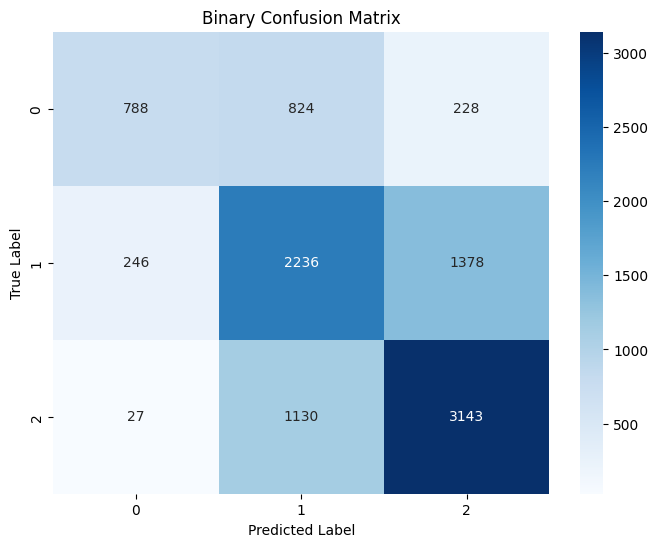

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calcula la matriz de confusión binaria
c_matrix_binary = confusion_matrix(y_test, pred_test)

# Crea el objeto de la figura
plt.figure(figsize=(8, 6))

# Plotea la matriz de confusión binaria
sns.heatmap(c_matrix_binary, annot=True, cmap='Blues', fmt='g')

plt.title('Binary Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


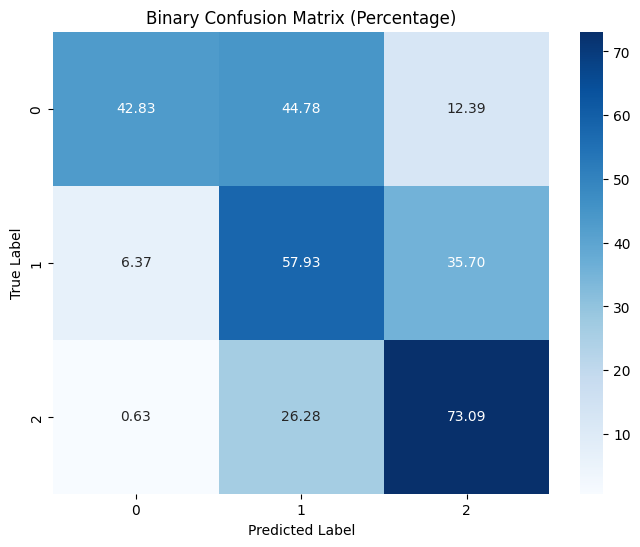

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Calcula la matriz de confusión binaria
c_matrix_binary = confusion_matrix(y_test, pred_test)

# Calcula los porcentajes dividiendo cada elemento de la matriz por el número total de muestras en esa clase
total_samples = c_matrix_binary.sum(axis=1)[:, np.newaxis]
c_matrix_binary_percent = (c_matrix_binary / total_samples) * 100

# Crea el objeto de la figura
plt.figure(figsize=(8, 6))

# Plotea la matriz de confusión binaria en porcentaje
sns.heatmap(c_matrix_binary_percent, annot=True, cmap='Blues', fmt='.2f')

plt.title('Binary Confusion Matrix (Percentage)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [28]:
filename = '../models_class/final_model1.pkl'
with open(filename, 'wb') as archivo_salida:
    pickle.dump(final_model, archivo_salida)

In [ ]:
## trata de darle peso a la precision

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import precision_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Definir la métrica de precisión para la búsqueda de hiperparámetros
precision = make_scorer(precision_score, average='weighted')

# Definir el espacio de búsqueda de hiperparámetros específico para RandomForestClassifier
param_dist = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2']
}

# Definir el pipeline con el clasificador RandomForest
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Realizar la búsqueda aleatoria de hiperparámetros con la métrica de precisión y una validación cruzada estratificada
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, cv=StratifiedKFold(n_splits=5), scoring=precision, n_iter=50, n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X_train, y_train)

# Obtener el mejor modelo
final_model = random_search.best_estimator_

# Obtener los mejores resultados
best_score = random_search.best_score_
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

print("Best Precision Score:", best_score)
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)





Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Precision Score: 0.6547874103096365
Best Parameters: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 20}
Best Estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=20, n_estimators=200,
                                        random_state=42))])


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predicciones sobre TRAIN
pred_train = final_model.predict(X_train)
pred_proba_train = final_model.predict_proba(X_train)

print("Resultados sobre TRAIN")
print('Accuracy:', accuracy_score(y_train, pred_train))
print('Precision:', precision_score(y_train, pred_train, average='weighted'))
print('Recall:', recall_score(y_train, pred_train, average='weighted'))
print('F1 Score:', f1_score(y_train, pred_train, average='weighted'))
print('Confusion Matrix:\n', confusion_matrix(y_train, pred_train))

# Predicciones sobre TEST
pred_test = final_model.predict(X_test)
pred_proba_test = final_model.predict_proba(X_test)

print("Resultados sobre TEST")
print('Accuracy:', accuracy_score(y_test, pred_test))
print('Precision:', precision_score(y_test, pred_test, average='weighted'))
print('Recall:', recall_score(y_test, pred_test, average='weighted'))
print('F1 Score:', f1_score(y_test, pred_test, average='weighted'))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred_test))

Resultados sobre TRAIN
Accuracy: 0.983125
Precision: 0.9832459146013014
Recall: 0.983125
F1 Score: 0.9831205526469821
Confusion Matrix:
 [[ 7318   162    77]
 [    4 14939   292]
 [    0   140 17068]]
Resultados sobre TEST
Accuracy: 0.6492
Precision: 0.6544678669613324
Recall: 0.6492
F1 Score: 0.6473359289340624
Confusion Matrix:
 [[ 921  700  219]
 [ 284 2385 1191]
 [  60 1054 3186]]


### Gradient Boosting 

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

# Definir el pipeline con el clasificador Gradient Boosting
steps = [('classifier', GradientBoostingClassifier(random_state=42))]
pipeline = Pipeline(steps)

# Definir el espacio de búsqueda de hiperparámetros
param_dist = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2', None]
}

# Realizar la búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, cv=4, n_iter=30, n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X_train, y_train)

# Obtener el mejor modelo
final_model = random_search.best_estimator_

# Obtener los mejores resultados
best_score = random_search.best_score_
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

# Entrenar el mejor modelo con los datos de entrenamiento
final_model.fit(X_train, y_train)

print("Best Score:", best_score)
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)


Fitting 4 folds for each of 30 candidates, totalling 120 fits
Best Score: 0.6383
Best Parameters: {'classifier__n_estimators': 100, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'log2', 'classifier__max_depth': 7, 'classifier__learning_rate': 0.05}
Best Estimator: Pipeline(steps=[('classifier',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=7,
                                            max_features='log2',
                                            random_state=42))])


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predicciones sobre TRAIN
pred_train = final_model.predict(X_train)
pred_proba_train = final_model.predict_proba(X_train)

print("Resultados sobre TRAIN")
print('Accuracy:', accuracy_score(y_train, pred_train))
print('Precision:', precision_score(y_train, pred_train, average='weighted'))
print('Recall:', recall_score(y_train, pred_train, average='weighted'))
print('F1 Score:', f1_score(y_train, pred_train, average='weighted'))
print('Confusion Matrix:\n', confusion_matrix(y_train, pred_train))

# Predicciones sobre TEST
pred_test = final_model.predict(X_test)
pred_proba_test = final_model.predict_proba(X_test)

print("Resultados sobre TEST")
print('Accuracy:', accuracy_score(y_test, pred_test))
print('Precision:', precision_score(y_test, pred_test, average='weighted'))
print('Recall:', recall_score(y_test, pred_test, average='weighted'))
print('F1 Score:', f1_score(y_test, pred_test, average='weighted'))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred_test))

Resultados sobre TRAIN
Accuracy: 0.69005
Precision: 0.6991436283937645
Recall: 0.69005
F1 Score: 0.6884160954227564
Confusion Matrix:
 [[ 4183  2501   873]
 [  732  9878  4625]
 [  121  3546 13541]]
Resultados sobre TEST
Accuracy: 0.6248
Precision: 0.6323588003280607
Recall: 0.6248
F1 Score: 0.6221150621459673
Confusion Matrix:
 [[ 854  754  232]
 [ 268 2246 1346]
 [  42 1110 3148]]


### Model 2: XGboost Classifier

In [28]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

# Definir el pipeline con el clasificador XGBoost
steps = [('classifier', XGBClassifier(random_state=42))]
pipeline = Pipeline(steps)

# Definir el espacio de búsqueda de hiperparámetros
param_dist = {
    'classifier__n_estimators': [100, 150, 200],
    'classifier__max_depth': [9, 10, 15],
    'classifier__learning_rate': [0.04,0.05],
    'classifier__subsample': [0.8, 0.9],
    'classifier__colsample_bytree': [0.8, 0.9],
    'classifier__gamma': [0, 0.1],
    'classifier__reg_alpha': [0.05, 0.3,0.5],
    'classifier__reg_lambda': [ 0.3,0.4]
}

# Realizar la búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, cv=4, n_iter=30, n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X_train, y_train)

# Obtener el mejor modelo
final_model1 = random_search.best_estimator_

# Obtener los mejores resultados
best_score = random_search.best_score_
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

# Entrenar el mejor modelo con los datos de entrenamiento
final_model1.fit(X_train, y_train)

print("Best Score:", best_score)
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)


Fitting 4 folds for each of 30 candidates, totalling 120 fits
Best Score: 0.6475
Best Parameters: {'classifier__subsample': 0.9, 'classifier__reg_lambda': 0.4, 'classifier__reg_alpha': 0.05, 'classifier__n_estimators': 150, 'classifier__max_depth': 15, 'classifier__learning_rate': 0.05, 'classifier__gamma': 0.1, 'classifier__colsample_bytree': 0.8}
Best Estimator: Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0.1, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               m

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predicciones sobre TRAIN
pred_train = final_model.predict(X_train)
pred_proba_train = final_model.predict_proba(X_train)

print("Resultados sobre TRAIN")
print('Accuracy:', accuracy_score(y_train, pred_train))
print('Precision:', precision_score(y_train, pred_train, average='weighted'))
print('Recall:', recall_score(y_train, pred_train, average='weighted'))
print('F1 Score:', f1_score(y_train, pred_train, average='weighted'))
print('Confusion Matrix:\n', confusion_matrix(y_train, pred_train))

# Predicciones sobre TEST
pred_test = final_model.predict(X_test)
pred_proba_test = final_model.predict_proba(X_test)

print("Resultados sobre TEST")
print('Accuracy:', accuracy_score(y_test, pred_test))
print('Precision:', precision_score(y_test, pred_test, average='weighted'))
print('Recall:', recall_score(y_test, pred_test, average='weighted'))
print('F1 Score:', f1_score(y_test, pred_test, average='weighted'))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred_test))

Resultados sobre TRAIN
Accuracy: 0.69005
Precision: 0.6991436283937645
Recall: 0.69005
F1 Score: 0.6884160954227564
Confusion Matrix:
 [[ 4183  2501   873]
 [  732  9878  4625]
 [  121  3546 13541]]
Resultados sobre TEST
Accuracy: 0.6248
Precision: 0.6323588003280607
Recall: 0.6248
F1 Score: 0.6221150621459673
Confusion Matrix:
 [[ 854  754  232]
 [ 268 2246 1346]
 [  42 1110 3148]]


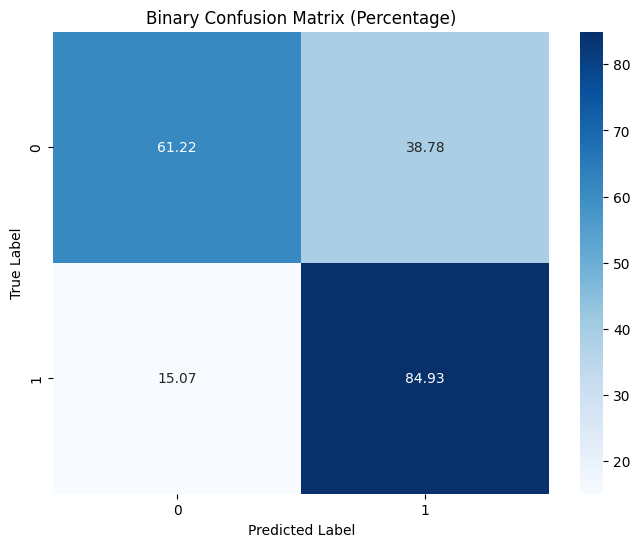

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Calcula la matriz de confusión binaria
c_matrix_binary = confusion_matrix(y_test, pred_test)

# Calcula los porcentajes dividiendo cada elemento de la matriz por el número total de muestras en esa clase
total_samples = c_matrix_binary.sum(axis=1)[:, np.newaxis]
c_matrix_binary_percent = (c_matrix_binary / total_samples) * 100

# Crea el objeto de la figura
plt.figure(figsize=(8, 6))

# Plotea la matriz de confusión binaria en porcentaje
sns.heatmap(c_matrix_binary_percent, annot=True, cmap='Blues', fmt='.2f')

plt.title('Binary Confusion Matrix (Percentage)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [42]:
filename = '../models_class/final_model2.pkl'
with open(filename, 'wb') as archivo_salida:
    pickle.dump(final_model1, archivo_salida)